# Installing and importing packages


In [34]:
! pip install -r requirements.txt

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

In [37]:
data = np.random.randn(500, 2)

In [38]:
print(data[0])
print("x: ", data[0, 0])
print("y: ", data[0, 1])

[1.0921377  0.67747196]
x:  1.09213770140744
y:  0.6774719637508223


## Lets work on simple linear regression

y = mx + b


In [39]:
theta = np.zeros(2)
print(theta)

[0. 0.]


## Defining loss function

MSE = 1/ N \* sum(y - y_hat)^2


In [40]:
def loss_function(data, theta):
    m = theta[0]
    b = theta[1]
    loss = 0

    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        loss += (y - (m * x + b)) ** 2

        y_hat = (m*x + b)
        loss += (y - y_hat) ** 2
    
    return loss / len(data)


print("loss: ", loss_function(data, theta))


loss:  1.9905998985284985


## Computing the gradient of the loss function

dJ/dm = 2/N _ sum (-x _ (y - \hat_y))


In [41]:
def compute_gradients(data, theta):
    gradients = np.zeros(2) # initialize gradients with 0
    N = float(len(data)) # number of data
    m = theta[0]
    b = theta[1]

    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        gradients[0] += -(2/N) * x * (y - (m*x + b)) # partial derivative with respect to m
        gradients[1] += -(2/N) * (y - (m*x + b))  # partial derivative with respect to b

        epsilon = 1e-6
        gradients = np.divide(gradients, N + epsilon) # to prevent division by zero error because of N = 0

    return gradients

print("gradients: ", compute_gradients(data, theta))

gradients:  [-2.44559537e-07 -1.78158077e-07]


## Updating the model paramaters

m = m - lr \* dJ/dm


In [42]:
num_iterations = 100000
lr = 1e-2
loss = []
theta = np.zeros(2)

for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    theta -= lr * gradients
    # store the loss value for visualization
    loss.append(loss_function(data, theta))

Text(0.5, 1.0, 'Gradient Descent')

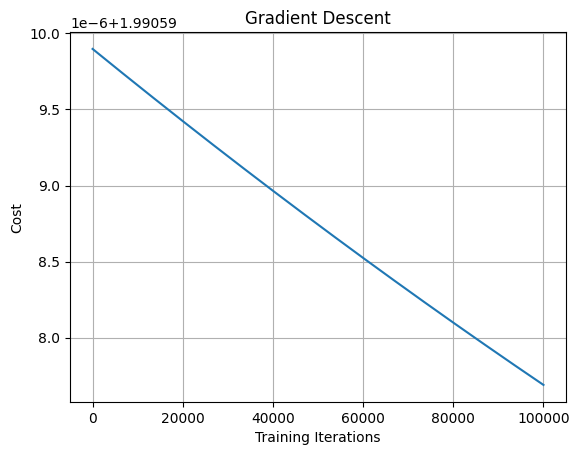

In [43]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

# Gradient descent versus stochastic gradient descent


## mini-batch gradient descent


In [48]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio=0.01, num_iterations=1000):
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    for t in range( num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size) # get random indices
        np.random.shuffle(data) # shuffle the data]
        sample_data = data[0:sample_size[0], :] # get the sample data
        gradients = compute_gradients(sample_data, theta)
        theta -= lr * gradients

    return theta

minibatch = minibatch(data, theta)
print("Theta from minibatch in 1000 iters: ", minibatch)

Theta from minibatch in 1000 iters:  [ 0.0354574  -0.09420295]


## Momentum-based gradient descent


In [50]:
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
    vt = np.zeros(2) # initialize vt
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        vt = gamma * vt + lr * gradients
        theta -= vt

    return theta


print("Theta from momentum in 1000 iters: ", momentum(data, theta))

Theta from momentum in 1000 iters:  [ 0.03565045 -0.09403205]


## Nesterov accelerated gradient


In [51]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
    vt = np.zeros(2) 
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta - gamma * vt)
        vt = gamma * vt + lr * gradients
        theta -= vt

    return theta

print("Theta from NAG in 1000 iters: ", NAG(data, theta))

Theta from NAG in 1000 iters:  [ 0.03584315 -0.09386147]


# Adaptive methods of gradient descent


## Adagrad


In [55]:
def AdaGrad(data, theta, lr=1e-2, epsilon=1e-6, num_iterations=10000):
    G = np.zeros(2) # initialize G
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        G += gradients ** 2
        theta -= lr * gradients / (np.sqrt(G + epsilon))

    return theta

print("Theta from AdaGrad in 1000 iters: ", AdaGrad(data, theta))

Theta from AdaGrad in 1000 iters:  [0.03641392 0.11893273]


## Ada delta


In [56]:
def AdaDelta(data, theta, gamma=0.9, epsilon=1e-5, num_iterations=1000):
    E_grad2 = np.zeros(2)
    E_delta_theta2 = np.zeros(2)

    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        E_grad2 = gamma * E_grad2 + (1 - gamma) * gradients ** 2
        delta_theta = -np.sqrt(E_delta_theta2 + epsilon) / np.sqrt(E_grad2 + epsilon) * gradients
        E_delta_theta2 = gamma * E_delta_theta2 + (1 - gamma) * delta_theta ** 2
        theta += delta_theta

    return theta


print("Theta from AdaDelta in 1000 iters: ", AdaDelta(data, theta))

Theta from AdaDelta in 1000 iters:  [0.03640614 0.11894148]


## Overcomming the limitations of Adagrad using RMSProp


In [57]:
def RMSProp(data, theta, lr=1e-2, gamma=0.9, epsilon=1e-6, num_iterations=1000):
    E_grad2 = np.zeros(2)
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        E_grad2 = gamma * E_grad2 + (1 - gamma) * gradients ** 2
        theta -= lr * gradients / (np.sqrt(E_grad2 + epsilon))
    return theta

print("Theta from RMSProp in 1000 iters: ", RMSProp(data, theta))

Theta from RMSProp in 1000 iters:  [0.03632836 0.11902903]


## Adaptive moment estimation


In [59]:
def Adam(data, theta, lr=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=10000):
    mt = np.zeros(2)
    vt = np.zeros(2)
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1 - beta1) * gradients
        vt = beta2 * vt + (1 - beta2) * gradients ** 2
        mt_hat = mt / (1 - beta1 ** (t + 1))
        vt_hat = vt / (1 - beta2 ** (t + 1))
        theta -= lr * mt_hat / (np.sqrt(vt_hat + epsilon))
    return theta

print("Theta from Adam in 1000 iters: ", Adam(data, theta))

Theta from Adam in 1000 iters:  [-1.25371513  1.59072169]


## Adamax - Adam based on infinity norm


In [ ]:
def Adamax(data, theta, lr=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    mt = np.zeros(2)
    vt = np.zeros(2)
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1 - beta1) * gradients
        vt = np.maximum(beta2 * vt, np.abs(gradients))
        mt_hat = mt / (1 - beta1 ** (t + 1))
        theta -= lr * mt_hat / (vt + epsilon)
    return theta

print("Theta from Adamax in 1000 iters: ",Adamax(data, theta))

## AMSGrad


In [62]:
def AMSGrad(data, theta, lr=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    mt = np.zeros(2)
    vt = np.zeros(2)
    vt_hat = np.zeros(2)
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1 - beta1) * gradients
        vt = beta2 * vt + (1 - beta2) * gradients ** 2
        vt_hat = np.maximum(vt_hat, vt)
        mt_hat = mt / (1 - beta1 ** (t + 1))
        theta -= lr * mt_hat / (np.sqrt(vt_hat) + epsilon)
    return theta

print("Theta from AMSGrad in 1000 iters: ", AMSGrad(data, theta))

Theta from AMSGrad in 1000 iters:  [-1.27172207  1.61126424]


## Nadam - adding NAG to ADAM


In [63]:
def nadam(data, theta, lr=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    mt = np.zeros(2)
    vt = np.zeros(2)
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1 - beta1) * gradients
        vt = beta2 * vt + (1 - beta2) * gradients ** 2
        mt_hat = mt / (1 - beta1 ** (t + 1))
        vt_hat = vt / (1 - beta2 ** (t + 1))
        theta -= lr * mt_hat / (np.sqrt(vt_hat) + epsilon) * (1 - beta1) / (1 - beta1 ** (t + 1))
    return theta

print("Theta from nadam in 1000 iters: ", nadam(data, theta))

Theta from nadam in 1000 iters:  [-1.27173797  1.61128238]
